In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

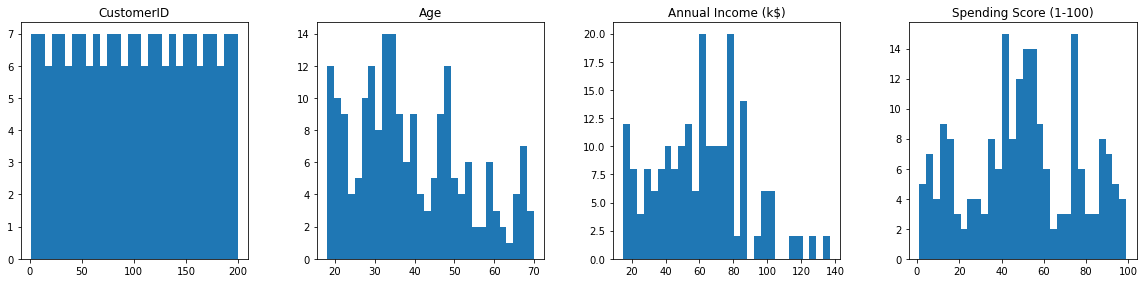

In [10]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

## Bivariate Analysis

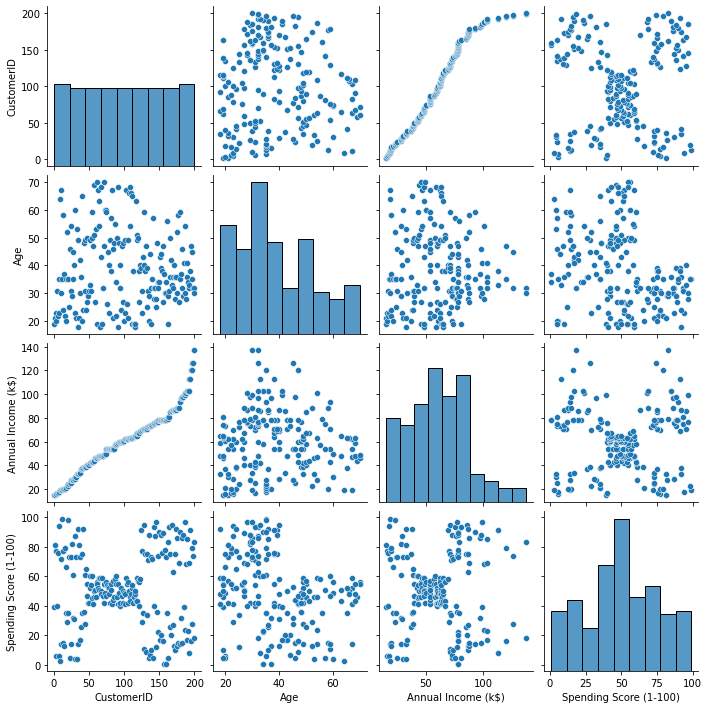

In [11]:
sns.pairplot(df)

## Multivariate Analysis

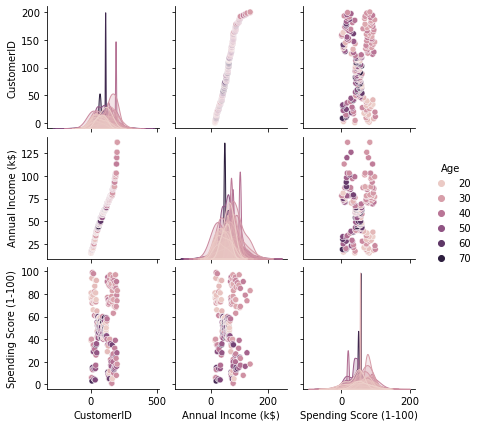

In [12]:
sns.pairplot(df,hue = 'Age',height = 2)

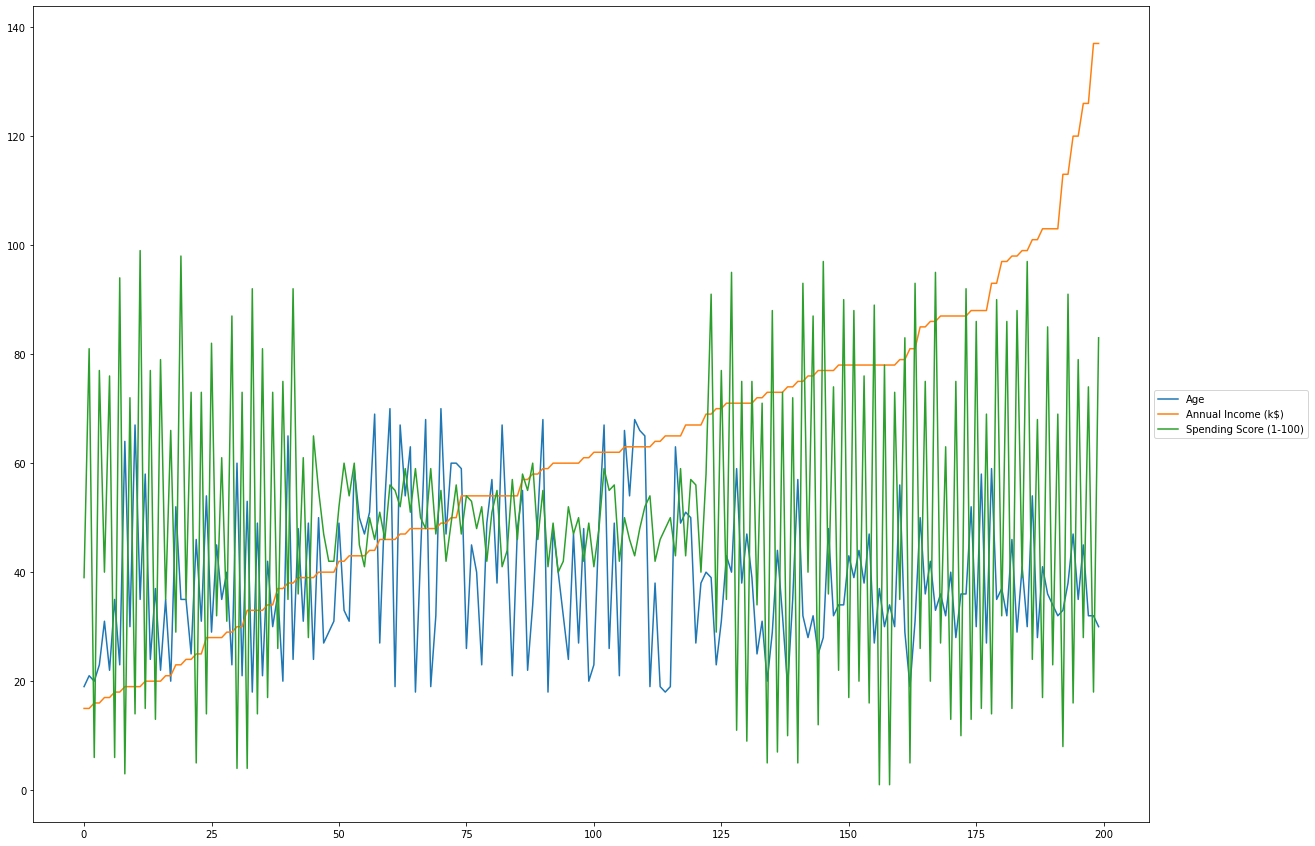

In [13]:
ax = df[["Age","Annual Income (k$)","Spending Score (1-100)"]].plot(figsize = (20,15))
ax.legend(loc = 'center left',bbox_to_anchor = (1,0.5))

## Descriptive Statistics

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\admin\AppData\Local\Temp\ipykernel_4028\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [16]:
numerical_features

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
categorical_features

Index(['Gender'], dtype='object')

<AxesSubplot:>

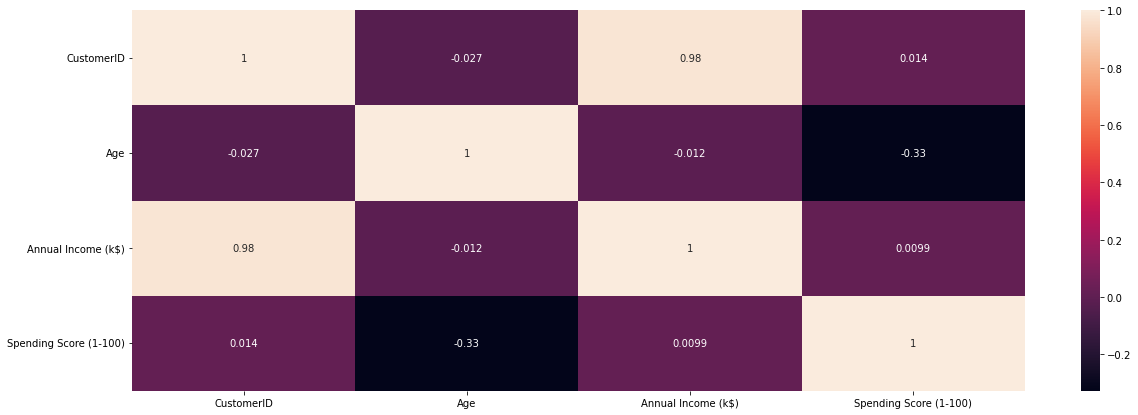

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

## Missing Values

In [19]:
df.isna().sum().sum()

0

## Outliers

In [20]:
df = pd.get_dummies(df)
dummy_df = df

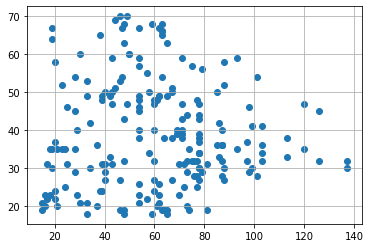

In [21]:
var = 'Annual Income (k$)'
plt.scatter(x = df[var], y = df['Age'])
plt.grid(True)

In [22]:
df.drop(df[(df['Annual Income (k$)'] > 15) &
          (df['Age'] < 10)].index, inplace = True)
df.drop(df[(df['Annual Income (k$)']< 15) & (
df['Age'] > 15)].index, inplace = True)

## Finding categorical columns and encoding

In [23]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [44]:
df_numeric = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_categorical = df[['Gender']]

In [45]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

In [46]:
gender_encoder.fit(df_categorical['Gender'])

LabelEncoder()

In [47]:
gender_values = gender_encoder.fit_transform(df_categorical['Gender'])

In [48]:
print("Before Encoding:", list(df['Gender'][-10:]))
print("After Encoding:", gender_values[-10:])
print("The inverse from the encoding result:", gender_encoder.inverse_transform(gender_values[-10:]))

Before Encoding: ['Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
After Encoding: [0 0 1 0 0 0 0 1 1 1]
The inverse from the encoding result: ['Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Male']


## Split the data into dependant and independent variables

In [25]:
X= df.iloc[ : ,2 :-1].values

y= df.iloc[ : , 4].values

In [26]:
X

array([[ 15,  39,   0],
       [ 15,  81,   0],
       [ 16,   6,   1],
       [ 16,  77,   1],
       [ 17,  40,   1],
       [ 17,  76,   1],
       [ 18,   6,   1],
       [ 18,  94,   1],
       [ 19,   3,   0],
       [ 19,  72,   1],
       [ 19,  14,   0],
       [ 19,  99,   1],
       [ 20,  15,   1],
       [ 20,  77,   1],
       [ 20,  13,   0],
       [ 20,  79,   0],
       [ 21,  35,   1],
       [ 21,  66,   0],
       [ 23,  29,   0],
       [ 23,  98,   1],
       [ 24,  35,   0],
       [ 24,  73,   0],
       [ 25,   5,   1],
       [ 25,  73,   0],
       [ 28,  14,   1],
       [ 28,  82,   0],
       [ 28,  32,   1],
       [ 28,  61,   0],
       [ 29,  31,   1],
       [ 29,  87,   1],
       [ 30,   4,   0],
       [ 30,  73,   1],
       [ 33,   4,   0],
       [ 33,  92,   0],
       [ 33,  14,   1],
       [ 33,  81,   1],
       [ 34,  17,   1],
       [ 34,  73,   1],
       [ 37,  26,   1],
       [ 37,  75,   1],
       [ 38,  35,   1],
       [ 38,  92

In [27]:
y

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=uint8)

## Split the data into training and testing

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [53]:
X_train

array([[ 46,  55,   0],
       [ 70,  77,   1],
       [ 97,  32,   1],
       [ 78,  16,   1],
       [ 54,  51,   0],
       [ 18,  94,   1],
       [ 33,  92,   0],
       [ 71,   9,   0],
       [ 34,  73,   1],
       [ 54,  47,   0],
       [ 98,  88,   1],
       [ 77,  97,   0],
       [ 39,  65,   1],
       [ 78,  73,   1],
       [ 46,  56,   0],
       [ 69,  91,   0],
       [ 93,  90,   0],
       [ 99,  97,   0],
       [ 69,  58,   1],
       [ 39,  28,   1],
       [ 21,  35,   1],
       [ 43,  41,   0],
       [ 78,  17,   0],
       [ 63,  54,   1],
       [ 25,   5,   1],
       [103,  85,   1],
       [ 71,  75,   0],
       [ 17,  40,   1],
       [ 54,  44,   1],
       [ 63,  50,   1],
       [ 73,   5,   0],
       [ 48,  50,   1],
       [ 28,  32,   1],
       [ 64,  46,   0],
       [ 87,  27,   1],
       [ 47,  59,   1],
       [ 19,   3,   0],
       [ 54,  54,   0],
       [ 67,  43,   1],
       [ 76,  87,   1],
       [ 49,  42,   1],
       [ 70,  29

In [55]:
X_test

array([[23, 29,  0],
       [87, 13,  0],
       [63, 46,  0],
       [61, 42,  0],
       [88, 69,  0],
       [98, 15,  0],
       [17, 76,  1],
       [77, 36,  0],
       [20, 15,  1],
       [78, 20,  1]], dtype=int64)

In [56]:
y_train

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [57]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=uint8)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X_train)

In [59]:
X_train_scale = scale.transform (X_train)
X_test_scale = scale.transform (X_test)

In [ ]:
X_train_scale.head()

## Building Model

In [68]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [75]:
train_preds= rf.predict(X_train)
test_preds = rf.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  
  
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
             "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [77]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

## Evaluation Metrics

In [78]:
show_score(rf)

{'Training MAE': 0.0,
 'Test MAE': 0.0,
 'Training MSE': 2.5830980855392383e-08,
 'Test MSE': 1.3507944117040056e-08,
 'Training RMSE': 0.00016072019429863934,
 'Test RMSE': 0.00011622368139514449,
 'Training R2': 1.0,
 'Test R2': 1.0}

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 'all')
fit = uni.fit(X, y)
reduced_training = fit.transform(X_train)
reduced_test = uni.transform(X_test)

E:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


## Train and Test the Model

In [ ]:
from sklearn.metrics import r2_score
s = r2_score(X_train,rf.predict(X_train))
print('R2 Score of training set:%.2f'%s)

p = r2_score(X_test,rf.predict(X_test))
print('R2 Score of testing set:%.2f'%p)